In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
def get_corr_matrix(df):
    corrMatrix = df.corr()
    plt.figure()
    sn.heatmap(corrMatrix, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, annot=True)
    plt.show()

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(["CustomerID"], axis=1, inplace=True)
df.Gender = df.Gender.map({"Male":1, "Female":0})
df.drop_duplicates()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.0,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


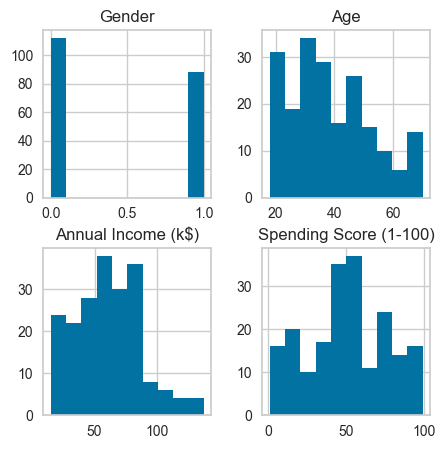

In [7]:
df.hist(figsize=(5, 5))
plt.show()

In [8]:
normalized_df=(df-df.mean())/df.std()

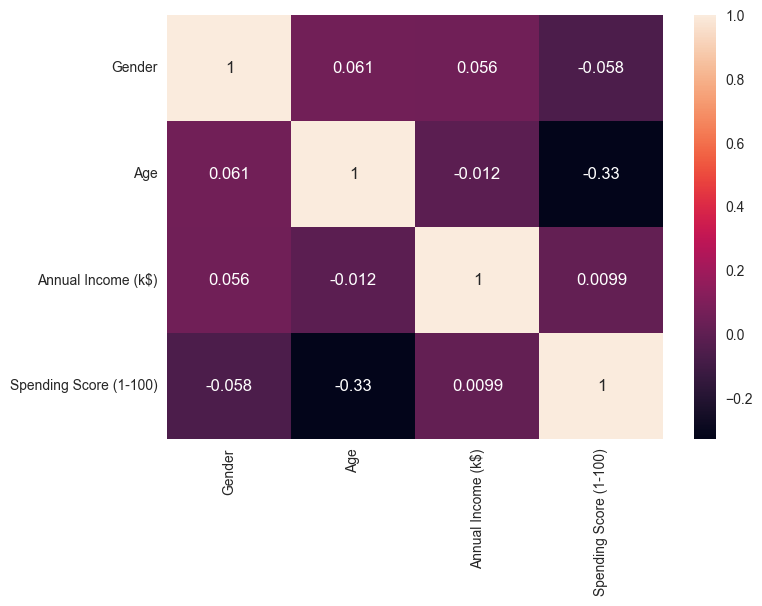

In [9]:
get_corr_matrix(normalized_df)

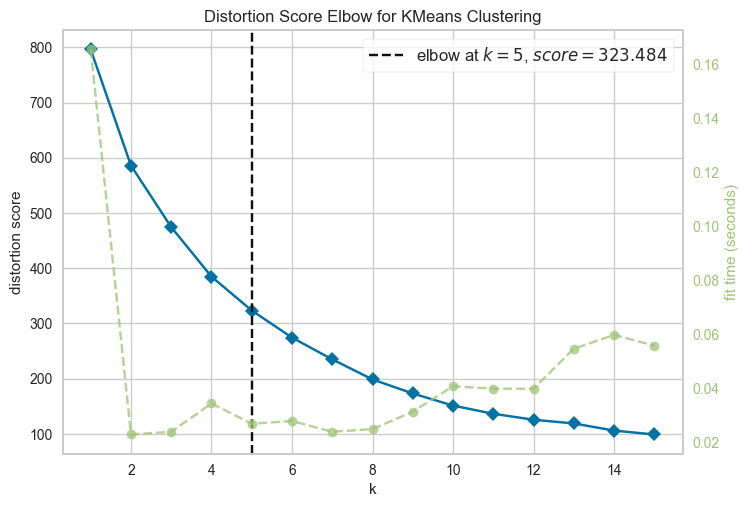

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
visualizer = KElbowVisualizer(KMeans(random_state=42, init="k-means++", n_init=10), k=(1,16))
visualizer.fit(normalized_df)
visualizer.show()

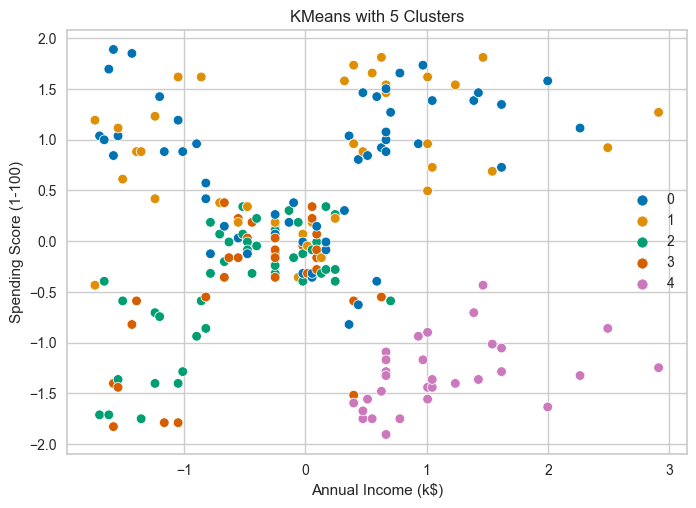

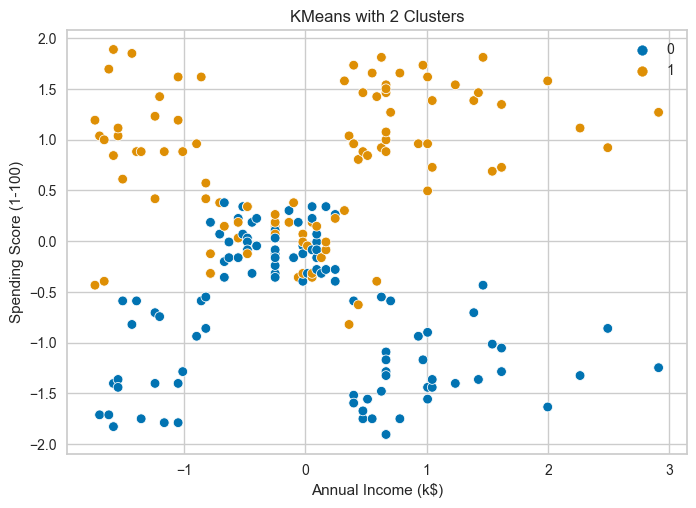

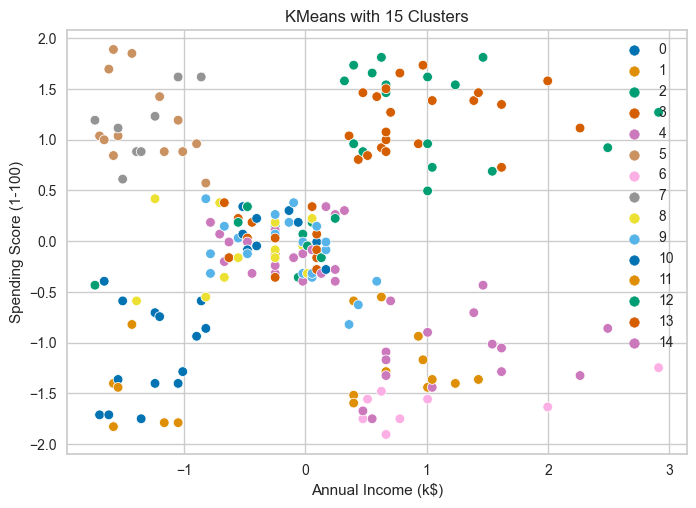

In [11]:
K = [5, 2, 15]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++", n_init=10).fit(normalized_df)
    plt.title("KMeans with " + str(k) + " Clusters")
    sn.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue=kmeans.labels_,
                     data=normalized_df, palette="colorblind",
                     legend="full")

    plt.show()